# Comparing Isolation Forest Algorithm with other classification models for Credit Crad Fraud detection

**In the age of digital world, credit card fraud is one of the most common yet very pervassive problem that affects many financial instutions as well as their clients. Its very important for banks and credit card companies to find this kind of transaction and flag them in timely manner and as acccurately as possible so that the proper actions can be taken.**

## About the data and workflow:

**This is one of the most common data used by many data scientist and data enthausiast for many great works. Here I am taking an approach to compare a main stream supervised machine learning models to a lesser known machine learning algorithm such as Isolation Forest Algorithm.**

**I will first do some EDA of the dataset, some cleaning up and scaling when needed. Then I will run a base model to do some feature engineering and hyper parameter testing, work on balancing the imbalance class data (using Undersampling techniques) and then finally generate a classification based model preferably a Logistic Regression. I will then validate the model in the validation dataset and then come up with the final accuracy scores and AUC value.**

**Once the model is generated, I will then apply lesser known Isolation Forest Algorithm that has great potential, to work properly on this kind of imbalanced data without the need of under-sampling, over-sampling or synthetic sampling to balance the highly imbalanced datset(ratio of 99.83:0.17).**

**Fianlly I will make some comparision of the results and make some final comments.** 

**The data is found in a Kaggle webpage and can be downloaded using following link:
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/data**

**This dataset contains the credit card transaction for 24 hours time period in September of 2013. The dataset contains only numerical values and this data is cleaned by banks and most of the features are masked for confidentaility. In Other word, This one is almost perfect data, where we dont need to worry much about the data wrangling and data manipulations.**


# Import the libraries, set up enviroment and dependencies

In [68]:
#import basic python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
#Lets set up the No of Column display such that all the data can be seen.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Import and and do some EDA**

In [90]:
#Import the data
df=pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [91]:
#check datatypes
print(df.columns)
print(df.dtypes)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [92]:
#check for Unique values
nunique = df.nunique()
nunique

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [93]:
#check for null values
df.isnull().sum().max()

0

**So far the data is great. No null values, no categorical values and no unique values in this dataset.** 

**Based on the independent varibale features, we have only two of the features that we know the name for. We want to have a feeling of how the amount(money) and the time of transaction is distributed. This will give us some sense of possible anomalies.**

In [94]:
#lets see some statistics measure for the Amount Amount feature
print(df['Amount'].describe())

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 0, 'Transaction Values(USD)')

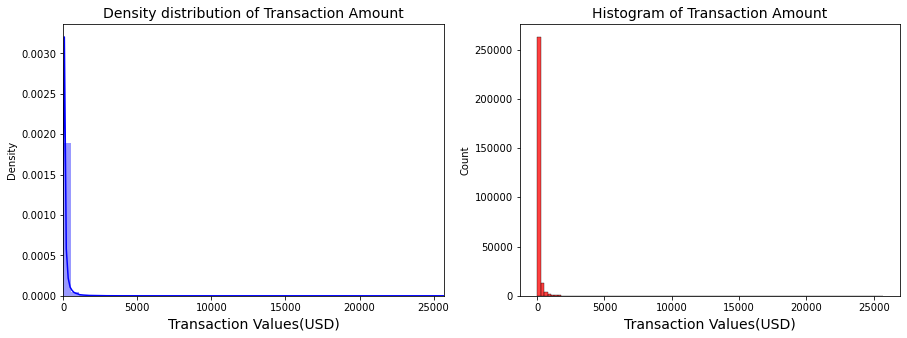

In [10]:
#lets plot the distribution of transaction amout for this dataset
fig, ax = plt.subplots(1,2,figsize=(15,5))

amount_val = df['Amount'].values
sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Density distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_xlabel('Transaction Values(USD)',fontsize=14)

sns.histplot(amount_val,ax=ax[1], bins=100, color='r')
ax[1].set_title('Histogram of Transaction Amount', fontsize=14)
ax[1].set_ylim=(0,30000)
ax[1].set_xlim=(min(df['Amount']), max(df['Amount']))
ax[1].set_xlabel('Transaction Values(USD)',fontsize=14)

In [11]:
#lets Check the time feature as well
#lets see some statistics measure for the amount
print(df['Time'].describe())
print((df['Time'].max()/3600),'Hrs')

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64
47.99777777777778 Hrs


**The time record is for 2 days. That is 48 hours.**

In [12]:
#First lets separate the data into two groups based on the class values
normal= df[df.Class==0]
fraud= df[df.Class==1]
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


**Now I want to check if there is a pattern of time distribution for Normal Vs Fraud Transaction?**

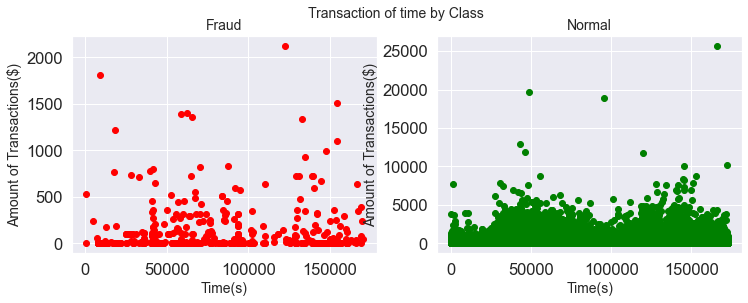

In [86]:
#Check how the normal and fraud distribution is distributed along time for two days
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Transaction of time by Class', fontsize=14)

ax1.scatter(fraud.Time, fraud.Amount, color='red')
ax1.set_title('Fraud', fontsize=14)
ax1.set_xlabel('Time(s)', fontsize=14)
ax1.set_ylabel('Amount of Transactions($)', fontsize=14)

ax2.scatter(normal.Time, normal.Amount, color='green' )
ax2.set_title('Normal', fontsize=14)
plt.xlabel('Time(s)', fontsize=14)
plt.ylabel('Amount of Transactions($)', fontsize=14)

plt.show();

**This does not show any significant time period where fraud occurs and its not clear.** 

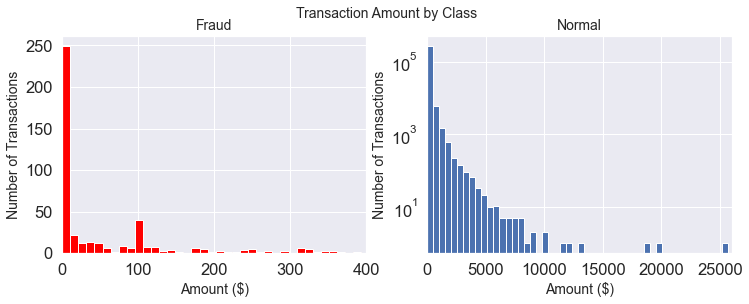

In [87]:
#Now lets plot the Normal Class and Fraud class data for the Transatcion Amount 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Transaction Amount by Class', fontsize=14)
ax1.hist(fraud.Amount, bins =200, color='red')
ax1.set_title('Fraud', fontsize=14)
ax1.set_xlim((0,400))
ax1.set_xlabel('Amount ($)', fontsize=14)
ax1.set_ylabel('Number of Transactions', fontsize=14)
ax2.hist(normal.Amount, bins = 50)
ax2.set_title('Normal', fontsize=14)
ax2.set_xlim((0, 26000))
plt.xlabel('Amount ($)', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.yscale('log')
plt.show();

**This shows that most of the fraud transaction are in smaller amount highly centered below 10 dollars or around 100 dollars. The normal transaction overlaps the fraud amounts but have a wide range.**

**Here in this dataset, most of the data has been cleaned up. PCA analysis is alos done and most of the data has been scaled. There are only two columns "Time" and "Amount" that needs rescaling so we can have an entirely scaled dataset.**

In [95]:
#Lets apply standards scalar to the dataset for the two features only
from sklearn.preprocessing import StandardScaler

St_scaler=StandardScaler()
df['Scaled_amount'] = St_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Scaled_time'] = St_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [96]:
#Now lets drop the origonal time and amount column and used the scaled time and scaled amount data
df.drop(['Time', 'Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_amount,Scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [97]:
#based on the above observation now we know the fraud data is the predicted class.
#lets separate the class from the df
print(df['Class'].shape)
print(df['Class'].value_counts())

(284807,)
0    284315
1       492
Name: Class, dtype: int64


**This is a highly skewed distribution with a large imbalance class of predicted data. This is a typical example of an imbalanced class problem.**

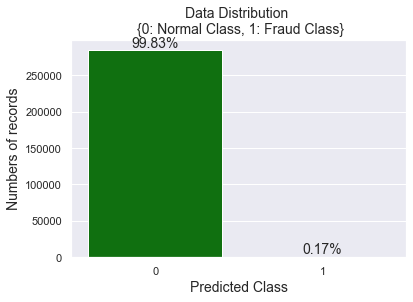

In [99]:
#### Graphical representation of the target label percentage.
total_len = len(df['Class'])
colors=['GREEN','RED']
sns.set()
sns.countplot(df['Class'], palette=colors).set_title('Data Distribution \n {0: Normal Class, 1: Fraud Class}',fontsize=14)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1)
ax.set_xlabel("Predicted Class",fontsize=14)
ax.set_ylabel("Numbers of records",fontsize=14)
plt.show()

**As we can see that based on the predicted class this data is highly imbalanced. About 0.17% of the data is in fraud class and 99.83% data is in legitimate(No Fraud) class.**

**0--> Normal class**

**1-->Fraud class**

# Here If I build a model based on this highly imbalanced class distribution of data, the result I get will show high accuracy but that would be a susceptible  result. So I will apply class balancing method.

**Among, many techniques I will use the subsampling of normal class of data to make the normal and fraud class balanced. Other methods like oversampling and SMOTE may not be best here given the percentage of disparity among the class as well as the large size data.**

**Now lets subsample the data from the normal class in such a way that we get the ratio of these two classes as 1:1.**

In [100]:
#taking random sampling of normal class
normal_sample=normal.sample(n=492)

In [101]:
#Now concatnate twodata frames
df_bal=pd.concat([normal_sample, fraud], axis=0)
print(df_bal.shape)
df_bal.head()

(984, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
39101,39694.0,-8.150239,-10.418934,0.133323,0.970938,0.608491,-0.784539,-0.448089,1.136439,-0.848751,-1.101813,0.845052,0.435148,-0.116537,0.104832,-1.042108,0.888267,1.031880,-1.114345,-0.428076,4.583203,1.457802,-0.243311,2.459143,-0.346430,0.678805,-0.375106,-0.057779,-0.972136,1157.32,0
194979,130848.0,0.284756,0.891679,-1.046148,-0.558208,1.307943,-0.760209,1.180545,-0.118874,-0.455672,-0.808612,0.878249,0.248341,-0.832844,-0.597048,-1.454491,0.028591,0.488000,0.302572,-0.049533,-0.197914,0.078184,0.310543,-0.034383,0.643845,-0.666714,0.332235,0.068551,0.123172,5.00,0
32346,36758.0,1.107567,-0.281967,0.531196,0.925091,0.074166,1.619829,-0.724602,0.483901,0.684894,-0.035406,-0.435754,0.641650,0.197059,-0.224235,-0.174097,0.534499,-0.859237,0.552371,0.304187,-0.022717,-0.073980,-0.096204,-0.233068,-1.713320,0.519587,-0.277488,0.073724,0.014036,49.00,0
249789,154577.0,0.236322,0.978982,-0.174627,-0.195310,1.009775,-1.222280,1.319298,-0.575675,-0.174135,-0.889624,-0.367602,0.030373,0.857354,-1.311068,0.684112,-0.018923,0.335380,0.656594,-0.097218,0.073321,0.233112,0.990408,-0.328503,-0.157025,-0.052802,-0.126401,-0.058827,-0.128081,15.00,0
134965,81051.0,-1.138871,0.116151,1.647558,0.614788,-0.394721,-0.769166,-0.635552,0.551934,-0.876251,-0.223763,1.523498,0.917912,0.436849,0.628170,1.244720,0.040301,0.205333,0.414751,1.956960,0.378814,0.096849,-0.144214,0.091802,0.597064,-0.768123,0.955903,-0.031278,-0.065975,13.64,0


**lets compare the effect of undersampling with the original dataset and see the effect.**

In [102]:
#for the original data
df_mean=df.groupby("Class").mean()
df_mean.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_amount,Scaled_time
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,-2.381845,1.808754,-3.510555,2.267085,-1.572886,-0.697659,-2.779547,0.284824,-1.288328,-2.833530,1.896798,-3.124281,-0.054572,-3.479829,-0.046384,-2.066391,-3.327151,-1.121210,0.339741,0.185838,0.356177,0.007012,-0.020119,-0.052474,0.020689,0.025779,0.085140,0.037768,0.067574,-0.147855
std,3.380116,2.566832,4.981887,3.217257,2.232108,0.990059,3.944502,0.404199,1.828288,4.021109,2.691778,4.433718,0.077444,4.938283,0.065824,2.932449,4.721615,1.591128,0.482132,0.263725,0.505456,0.009951,0.028551,0.074467,0.029360,0.036584,0.120823,0.053597,0.095895,0.209824
min,-4.771948,-0.006271,-7.033281,-0.007860,-3.151225,-1.397737,-5.568731,-0.000987,-2.581123,-5.676883,-0.006576,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,-0.001178,-0.000644,-0.001235,-0.000024,-0.040308,-0.105130,-0.000072,-0.000089,-0.000295,-0.000131,-0.000234,-0.296223
25%,-3.576897,0.901241,-5.271918,1.129612,-2.362055,-1.047698,-4.174139,0.141918,-1.934726,-4.255206,0.945111,-4.691837,-0.081953,-5.225776,-0.069656,-3.103168,-4.996494,-1.683759,0.169281,0.092597,0.177471,0.003494,-0.030214,-0.078802,0.010308,0.012845,0.042422,0.018819,0.033670,-0.222039
50%,-2.381845,1.808754,-3.510555,2.267085,-1.572886,-0.697659,-2.779547,0.284824,-1.288328,-2.833530,1.896798,-3.124281,-0.054572,-3.479829,-0.046384,-2.066391,-3.327151,-1.121210,0.339741,0.185838,0.356177,0.007012,-0.020119,-0.052474,0.020689,0.025779,0.085140,0.037768,0.067574,-0.147855
75%,-1.186794,2.716266,-1.749192,3.404557,-0.783716,-0.347620,-1.384955,0.427730,-0.641931,-1.411853,2.848486,-1.556724,-0.027192,-1.733882,-0.023112,-1.029613,-1.657808,-0.558662,0.510200,0.279078,0.534883,0.010531,-0.010025,-0.026146,0.031069,0.038714,0.127857,0.056718,0.101478,-0.073671
max,0.008258,3.623778,0.012171,4.542029,0.005453,0.002419,0.009637,0.570636,0.004467,0.009824,3.800173,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,0.680659,0.372319,0.713588,0.014049,0.000070,0.000182,0.041449,0.051648,0.170575,0.075667,0.135382,0.000513


In [103]:
#for the balanced data
df_bal_mean=df_bal.groupby("Class").mean()
df_bal_mean.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,89039.851626,-2.440564,1.841062,-3.559069,2.281873,-1.564581,-0.700017,-2.786802,0.316659,-1.335032,-2.876602,1.901677,-3.150240,-0.082493,-3.487483,-0.045752,-2.073116,-3.296021,-1.097772,0.369765,0.204677,0.348054,0.037290,-0.025277,-0.062914,0.017681,0.021679,0.107067,0.041856,107.194370
std,11728.136310,3.297076,2.521142,4.913278,3.196343,2.243854,0.986725,3.934241,0.359178,1.762238,3.960195,2.684878,4.397006,0.037959,4.927459,0.066719,2.922939,4.765638,1.624275,0.439672,0.237082,0.516944,0.032867,0.021257,0.059702,0.033612,0.042383,0.089814,0.047817,21.237176
min,80746.806911,-4.771948,0.058345,-7.033281,0.021717,-3.151225,-1.397737,-5.568731,0.062682,-2.581123,-5.676883,0.003182,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.058870,0.037034,-0.017481,0.014049,-0.040308,-0.105130,-0.006086,-0.008290,0.043559,0.008044,92.177419
25%,84893.329268,-3.606256,0.949703,-5.296175,1.151795,-2.357903,-1.048877,-4.177767,0.189670,-1.958078,-4.276742,0.952430,-4.704817,-0.095913,-5.229603,-0.069340,-3.106531,-4.980929,-1.672040,0.214317,0.120856,0.165286,0.025669,-0.032793,-0.084022,0.005798,0.006695,0.075313,0.024950,99.685894
50%,89039.851626,-2.440564,1.841062,-3.559069,2.281873,-1.564581,-0.700017,-2.786802,0.316659,-1.335032,-2.876602,1.901677,-3.150240,-0.082493,-3.487483,-0.045752,-2.073116,-3.296021,-1.097772,0.369765,0.204677,0.348054,0.037290,-0.025277,-0.062914,0.017681,0.021679,0.107067,0.041856,107.194370
75%,93186.373984,-1.274871,2.732420,-1.821963,3.411951,-0.771258,-0.351157,-1.395838,0.443647,-0.711987,-1.476461,2.850925,-1.595664,-0.069072,-1.745363,-0.022163,-1.039701,-1.611114,-0.523504,0.525212,0.288498,0.530821,0.048910,-0.017762,-0.041807,0.029565,0.036664,0.138821,0.058762,114.702846
max,97332.896341,-0.109179,3.623778,-0.084857,4.542029,0.022064,-0.002297,-0.004874,0.570636,-0.088941,-0.076321,3.800173,-0.041087,-0.055652,-0.003244,0.001426,-0.006286,0.073794,0.050764,0.680659,0.372319,0.713588,0.060530,-0.010246,-0.020699,0.041449,0.051648,0.170575,0.075667,122.211321


**Based on above observation we can see that the balanced and undersampled datataset seems to have very similar statistical measures indicating that undersampling techniques has kept the properties of the data close to the original oe.**

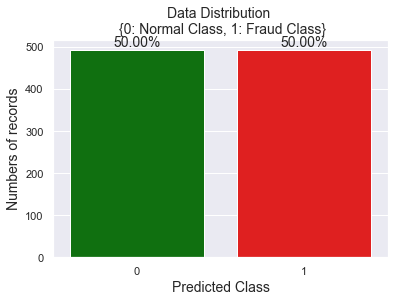

In [104]:
#Showing the Distribution of class in new dataset
total_len = len(df_bal['Class'])
colors=['GREEN','RED']
sns.set()
sns.countplot(df_bal['Class'], palette=colors).set_title('Data Distribution \n {0: Normal Class, 1: Fraud Class}',fontsize=14)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1)
ax.set_xlabel("Predicted Class",fontsize=14)
ax.set_ylabel("Numbers of records",fontsize=14)
plt.show()

# Now lets separate the X and y varibale from the data for creating base model.

In [105]:
#separate X(indepented) and y (dependent) varibales
y=df_bal['Class']
X=df_bal.drop(['Class'], axis =1)
print(y.shape)
print(X.shape)

(984,)
(984, 30)


**Next step would be to see if the dependent variables have some colinearity or multi colinearity. to find that out, lets run the sns heat map for the X variables.**


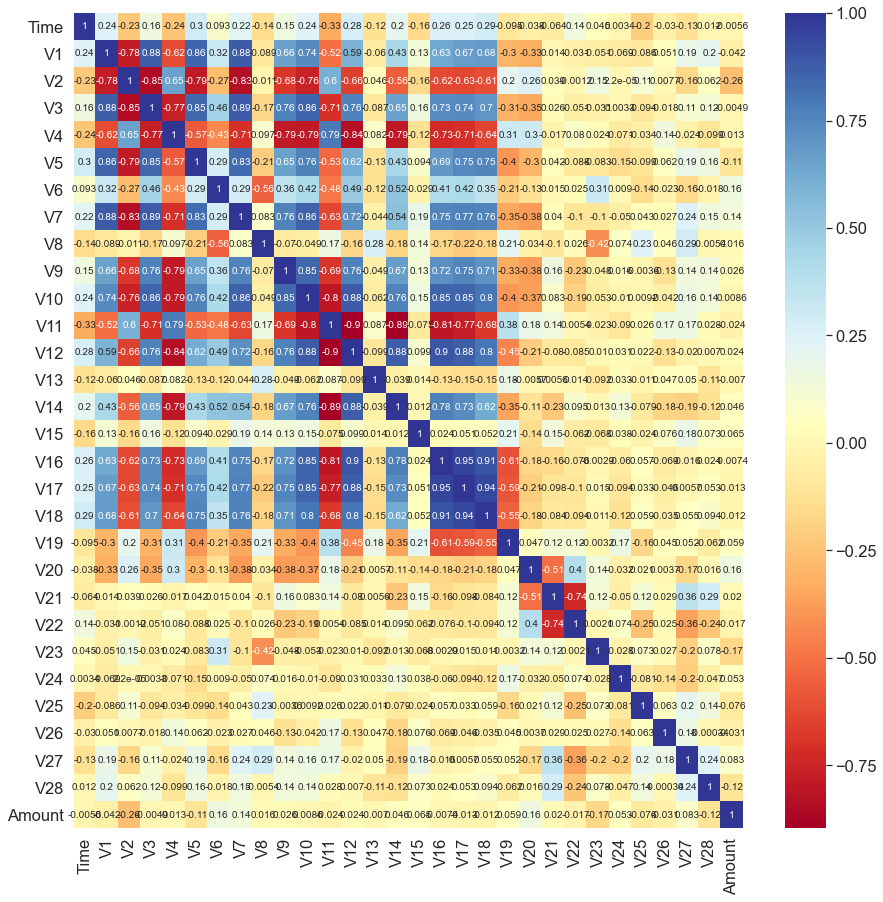

In [106]:
# First lets look on heat map
import matplotlib.pyplot as plt 
X=X.iloc[:] 
y=y[:]
corrmat = X.corr() 
top_corr_features = corrmat.index 
plt.figure(figsize=(15,15)) 
#plot heat map 
sns.set(font_scale=1.5) 
graph=sns.heatmap(X[top_corr_features].corr(),annot=True,annot_kws={'size': 10}, cmap="RdYlBu")

In [107]:
# lets check with simple person correlation and see if any columns are highly correlated threshold of 0.8

def correlation(X, threshold):
    col_corr=set()
    corr_matrix=X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation(X, 0.8)
#len(set(corr_features))
corr_features

{'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V3', 'V5', 'V7'}

In [108]:
# I will do one more test for multi-colinearlity and see what stands out.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =pd.DataFrame()
vif['Variance inflation factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature_names'] = X.columns

In [109]:
#Its normally that we use 10 as threshold to cut off varaiance of the data. But in this data since we dont 
#know what most of these feature really means and I have already filles null values with interative and frequency 
#so I am going to use a higher value of 10

high_vif_col = vif[vif['Variance inflation factor']>=10]
print(high_vif_col)

    Variance inflation factor feature_names
1                   14.677199            V1
2                   24.399417            V2
3                   25.788812            V3
4                   10.038731            V4
5                   31.084855            V5
7                   71.783754            V7
10                  25.675210           V10
11                  11.860773           V11
12                  24.127570           V12
14                  19.523775           V14
16                  26.008439           V16
17                  31.266171           V17
18                  13.734520           V18
29                  11.985070        Amount


**Based on the above three techniques, they indicate that there is some colinearity in the given datasetset so lets remove these features.**

In [110]:
X_dropped=X.drop(['V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V1','V2', 'V3', 'V5', 'V7'], axis=1)
print(X_dropped.shape)
X_dropped.head()

(984, 18)


,Time,V4,V6,V8,V9,V13,V15,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
39101,39694.0,0.970938,-0.784539,1.136439,-0.848751,-0.116537,-1.042108,-0.428076,4.583203,1.457802,-0.243311,2.459143,-0.346430,0.678805,-0.375106,-0.057779,-0.972136,1157.32
194979,130848.0,-0.558208,-0.760209,-0.118874,-0.455672,-0.832844,-1.454491,-0.049533,-0.197914,0.078184,0.310543,-0.034383,0.643845,-0.666714,0.332235,0.068551,0.123172,5.00
32346,36758.0,0.925091,1.619829,0.483901,0.684894,0.197059,-0.174097,0.304187,-0.022717,-0.073980,-0.096204,-0.233068,-1.713320,0.519587,-0.277488,0.073724,0.014036,49.00
249789,154577.0,-0.195310,-1.222280,-0.575675,-0.174135,0.857354,0.684112,-0.097218,0.073321,0.233112,0.990408,-0.328503,-0.157025,-0.052802,-0.126401,-0.058827,-0.128081,15.00
134965,81051.0,0.614788,-0.769166,0.551934,-0.876251,0.436849,1.244720,1.956960,0.378814,0.096849,-0.144214,0.091802,0.597064,-0.768123,0.955903,-0.031278,-0.065975,13.64


**To Create a base model and test it lets split the data into Training an Test sets but I will use all the features and select the base features based on coeffecients of the models. I will also compare the features that has been flagged by cross corelation and VIF methods before finalizing the features.**

In [111]:
##lets import machine learning libraries
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [112]:
#lets split the data in 80/20 ratio with training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(787, 30)
(197, 30)
(787,)
(197,)


**Lets run logistic regression on this dataset with all the features.**

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       102
           1       0.99      0.87      0.93        95

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

[[101   1]
 [ 12  83]]
Accuracy  ::  0.934010152284264
AUC:  0.942827657378741


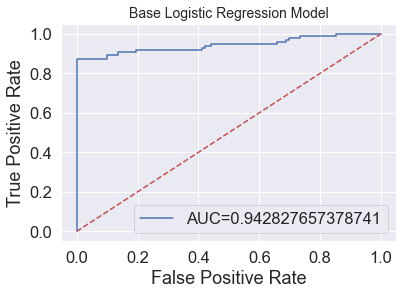

In [114]:
lr_model=LogisticRegression()

# Fit our data
lr_model.fit(X_train, y_train)

expected = y_test
prediction = lr_model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, prediction))
print(metrics.confusion_matrix(expected, prediction))

print ("Accuracy  :: ", accuracy_score(expected, prediction))

acc_base_model= round(lr_model.score(X_train, y_train) * 100, 4)

# Finding AUC Score for this model on test data
lr_model_probs=lr_model.predict_proba(X_test)[::,1]
print('AUC: ', roc_auc_score(y_test, lr_model_probs))

fpr, tpr, _ = metrics.roc_curve(y_test,  lr_model_probs)
auc = metrics.roc_auc_score(y_test, lr_model_probs)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Base Logistic Regression Model', fontsize=14)
plt.legend(loc=4)
plt.show()


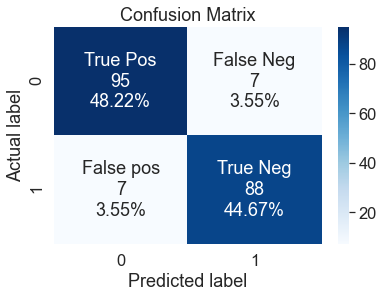

In [32]:
#Now lets Plot the confusion Matrix
ax= plt.subplot()
cf_matrix = metrics.confusion_matrix(y_test,prediction)

group_names = ['True Pos','False Neg','False pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

**Next Step is to apply the Grid Search CV to find the best parameters to use for final model.**

In [115]:
from sklearn.model_selection import GridSearchCV

#parameters for LOGISTIC Regression
log_reg_params = {'penalty': ['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [116]:
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.01%


In [117]:
grid_log_reg.best_params_

{'C': 10, 'penalty': 'l2'}

**Now I also want to use the base model coefficients to find 10 most important features to use for final Logistic Regression model.**

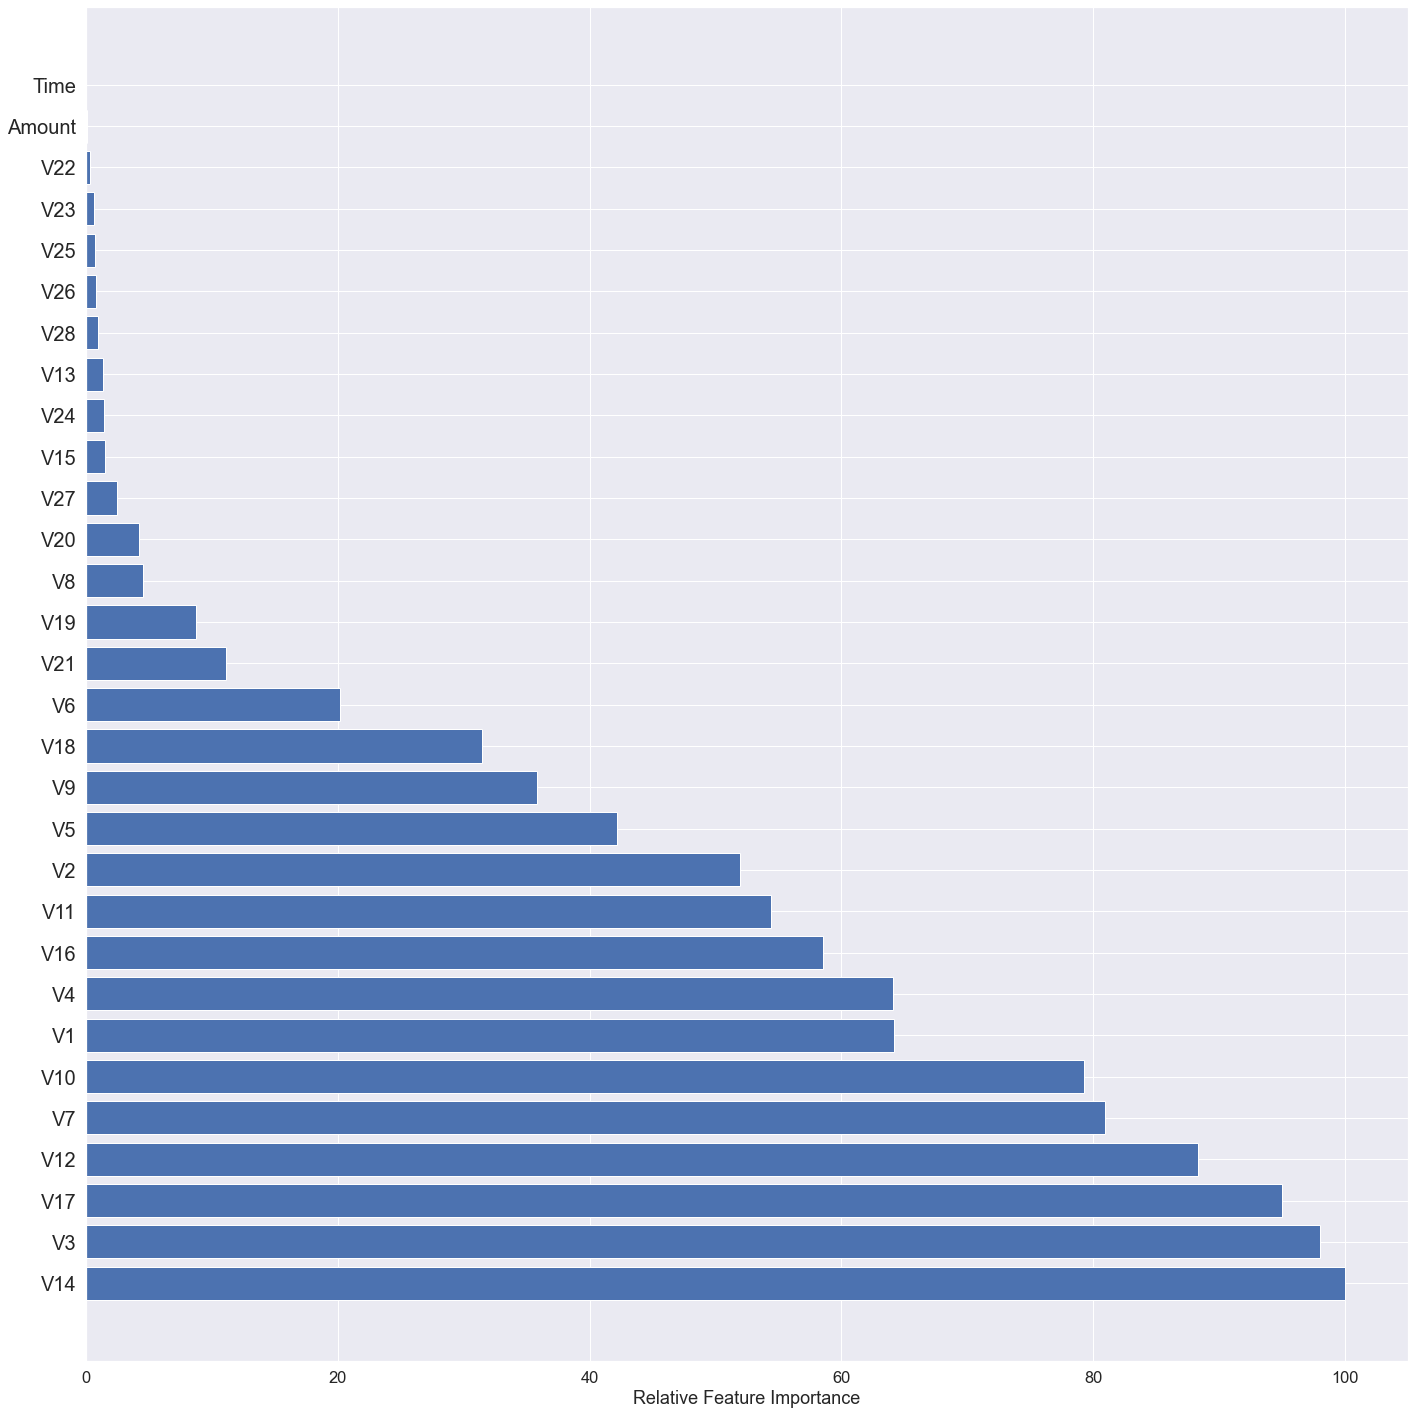

In [118]:
#Finding the most important features based on base model feature coefficients
feature_importance = abs(lr_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1][:]
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure(figsize=(20,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=20)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

In [119]:
#lets make a feature importance with reduced set 
importances = abs(lr_model.coef_[0])
importances_top10= np.argsort(importances)[::-1][0:10]
important_feature_index = [i for i in importances_top10]
important_features_to_model = X_train.iloc[:, important_feature_index]
reducedSet = important_features_to_model.columns
print(reducedSet)

Index(['V14', 'V3', 'V17', 'V12', 'V7', 'V10', 'V1', 'V4', 'V16', 'V11'], dtype='object')


In [120]:
X_train_r = X_train[reducedSet]
X_test_r = X_test[reducedSet]
X_test_r.shape,X_train_r.shape

((197, 10), (787, 10))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       102
           1       0.98      0.92      0.95        95

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

[[100   2]
 [  8  87]]
Accuracy  ::  0.949238578680203
AUC:  0.9821465428276573


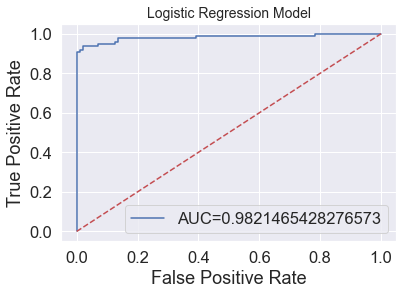

In [121]:
model=LogisticRegression(C=0.1, penalty='l2')

# Fit our data
model.fit(X_train_r, y_train)

expected = y_test
prediction_m = model.predict(X_test_r)

# summarize the fit of the model
print(metrics.classification_report(expected, prediction_m))
print(metrics.confusion_matrix(expected, prediction_m))

print ("Accuracy  :: ", accuracy_score(expected, prediction_m))

acc_base_model= round(model.score(X_train_r, y_train) * 100, 4)

# Finding AUC Score for this modelon test data
model_probs=model.predict_proba(X_test_r)[::,1]
print('AUC: ', roc_auc_score(y_test, model_probs))

fpr, tpr, _ = metrics.roc_curve(y_test,  model_probs)
auc = metrics.roc_auc_score(y_test, model_probs)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression Model', fontsize=14)
plt.legend(loc=4)
plt.show()

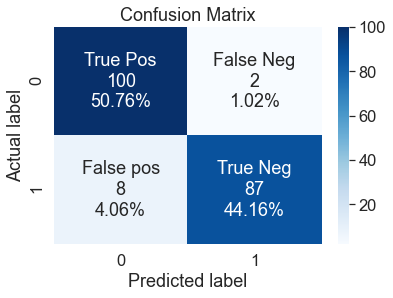

In [122]:
#Now lets Plot the confusion Matrix
ax= plt.subplot()
cf_matrix = metrics.confusion_matrix(y_test,prediction_m)

group_names = ['True Pos','False Neg','False pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

**Based on final Logistoc Regression model, we have achieved Accuracy score and F-1 score of 0.95%. The ROC AUC curve also show a very high ~0.98 for the test data after validating the model in the test data. Out of 197 test cases, 187 cases are correctly classified. 8 of them are on False positive category and 2 are on False negarive category. This results is pretty good. But keep in mind that this is based on the undersampling techniques applied to this data set. We are Using only about 0.0025% of the total data from the given datset.**

# There are some new algorithms in Machine Learning Techniques that are less susceptible to the imbalanced class data. Here, I will try one that I like for the larger dataset.

# Isolation Forest Algorithm:

**As the name stated, this method works for the anomalies that are a few in number and distinct. Since these stand out as anomalies, the algorithm is supposed to find and isolate them. Fraud cases are also small in number and more often are isolated and anamolous. That is why credit card fraud data is a good venue to test this algorithm.**

**According to AnalyticsVidhya Blog, the Isolation Forest Algorithm works based on following steps:**

**"Isolation Forests are nothing but an ensemble of binary decision trees. And each tree in an Isolation Forest is called an Isolation Tree(iTree). The algorithm starts with the training of the data, by generating Isolation Trees.**

**For given dataset, a random sub-sample of the data is selected and assigned to a binary tree. 
Branching of the tree starts by selecting a random feature (from the set of all N features). And then branching is done on a random threshold ( any value in the range of minimum and maximum values of the selected feature).
If the value of a data point is less than the selected threshold, it goes to the left branch else to the right. And thus a node is split into left and right branches.
This process continued recursively till each data point is completely isolated or till max depth(if defined) is reached.
The above steps are repeated to construct random binary trees.**

**After an ensemble of iTrees(Isolation Forest) is created, model training is complete. During scoring, a data point is traversed through all the trees which were trained earlier. Now, an ‘anomaly score’ is assigned to each of the data points based on the depth of the tree required to arrive at that point. This score is an aggregation of the depth obtained from each of the iTrees. An anomaly score of -1 is assigned to anomalies and 1 to normal points based on the contamination(percentage of anomalies present in the data) parameter provided."**

**Now I will run the Isolation Forest Tree and another mainstream supervised model Support Vector Machine(SVM) in tandem and compare the result for the larger(50%) dataset.**

In [123]:
df.shape

(284807, 31)

**Since this data is too big for my personal machine to run in respect to time, I am gonna take 50% samples of the the data and run the models.**

In [124]:
df1= df.sample(frac = 0.5,random_state=42)
print(df1.shape)
print(df['Class'].value_counts())
print(df1['Class'].value_counts())

(142404, 31)
0    284315
1       492
Name: Class, dtype: int64
0    142158
1       246
Name: Class, dtype: int64


In [125]:
#lets Separate dependetnt and independent variables.
columns = df.columns.tolist()
state = np.random.RandomState(42)
X1=[c for c in columns if c not in ["Class"]]
X1=df1[columns]
y1=df1['Class']
print(X1.shape)
print(y1.shape)

(142404, 31)
(142404,)


In [126]:
frd = y1[y1==1]
nrml = y1[y1==0]
outlier_fraction = len(frd)/float(len(nrml))
print(outlier_fraction)
print("Fraud Cases : {}".format(len(frd)))
print("Valid Cases : {}".format(len(nrml)))

0.0017304689148693708
Fraud Cases : 246
Valid Cases : 142158


In [65]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report,accuracy_score
from sklearn.svm import OneClassSVM

In [127]:
#lets define classifier dictionary for the model parameters
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X1), 
                                       contamination=outlier_fraction, random_state=state, verbose=0),
     "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, max_iter=-1)
}

In [67]:
n_outliers = len(frd)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Support Vector Machine":
        y1_pred = clf.fit_predict(X1)
        scores_prediction = clf.predict(X1)
    else:    
        clf.fit(X1)
        scores_prediction = clf.decision_function(X1)
        y1_pred = clf.predict(X1)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y1_pred[y1_pred == 1] = 0
    y1_pred[y1_pred == -1] = 1
    n_errors = (y1_pred != y1).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y1,y1_pred))
    print("Classification Report :")
    print(classification_report(y1,y1_pred))

Isolation Forest: 285
Accuracy Score :
0.9979986517232662
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.42      0.42      0.42       246

    accuracy                           1.00    142404
   macro avg       0.71      0.71      0.71    142404
weighted avg       1.00      1.00      1.00    142404

Support Vector Machine: 7197
Accuracy Score :
0.9494606893064802
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    142158
           1       0.03      0.85      0.05       246

    accuracy                           0.95    142404
   macro avg       0.51      0.90      0.51    142404
weighted avg       1.00      0.95      0.97    142404



**Here Isolation Forest Algorithm produced Accuracy Score of 99.8% for the 50% of the Data record of 142158 cases. we know that the predicted class has 246 Fraud cases but the Isolation Forest is predicting that nuber to be 285. Although the Number seems off by 41 but if we think about the total number of records the False positive prediction is ~0.0003% of the entire datset.**

**Also things to keep in mind: It is probably better for a Credit Crad company to falg some of this possible transaction as Fasle Positive Fraud cases, because, they can be looked into more carefully and can be communicated well with the cleints so that the Fraud can be classied properly rather than let the Fraud cases slip through the cracks.**

**Now if we look on the SVM classification result for the 50% of the data set, we see Accuracy score of 95%. But if you we look on  number of transaction that is flagged as fraud its 7197 cases in regard to true 246 cases. So A vast mejority of cases (about 5%) is flagged as False positive, which is a problem and shows that SVM for the imbalanced class of data such as credit card fraud can give us some flase prediction.**

**Another point to note is for normal logistic regression, we had to downsize the sample to balance the class, so we are working with ~0.0035% of the records. Although the metric looks great on the smaller subset, when we over sample the fraud class or use another techniques such as SMOTE to balance the data, the model prediction detoriated.**


# Here I have shown that,  for highly imbalanced class data such as credit card fraud, lesser-known Algorithm like Isolation Forest can come handy and can produce some great results.